In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from Value_engine import Value
from Viz import draw_graph
from MLP import MLP, Neuron, Layer

In [2]:
x1 = Value(1, label='x1')
x2 = Value(0, label='x2')
w1 = Value(-0.7, label='w1')
w2 = Value(0.2, label='w2')
b = Value(0.45, label='b')
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
in_prod = x1w1 + x2w2; in_prod.label='x1w1 + x2w2'
n = in_prod + b; n.label='n'
e = (2*n).exp()
o = (e -1) / (e + 1); o.label='o'
# o = n.tanh(); o.label='o'
o.backward()

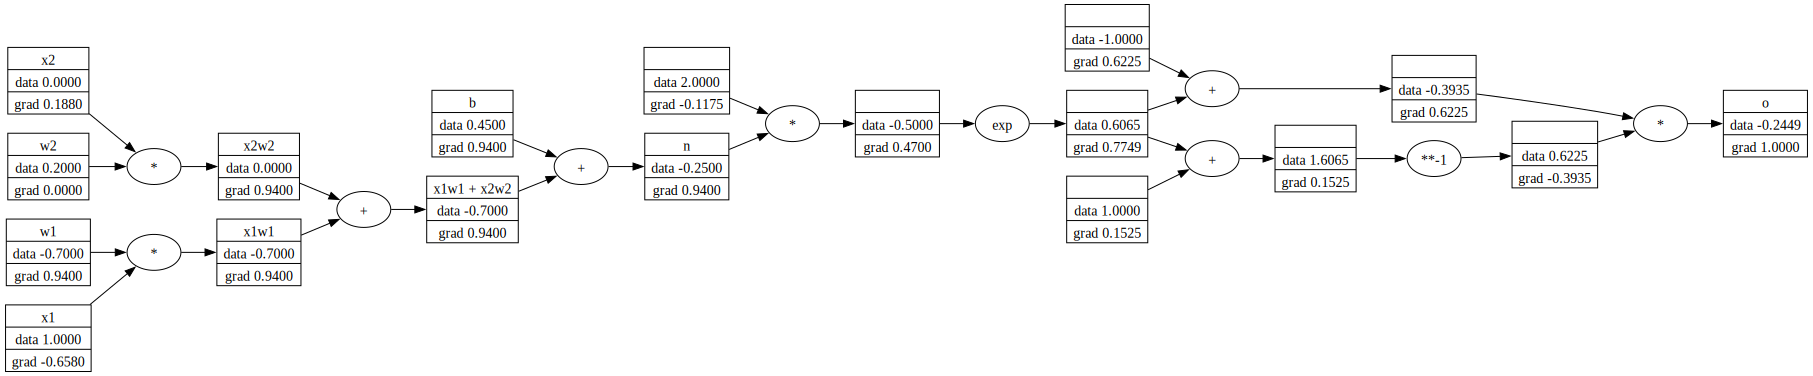

In [3]:
draw_graph(o)

In [4]:
def mse_loss(ypred, ytrue):
  loss = sum((ypred_i - ytrue_i)**2 for ypred_i, ytrue_i in zip(ypred, ytrue))
  return loss

xs = [[2,3,-1],
      [3,-1,0.5],
      [0.5,1,1],
      [1,1,-1]]

ys = [1.0,-1.0,-1.0,1.0]

In [5]:
model = MLP(3, [4,4,1])

In [6]:
lr = 0.1

loss_all = 0

for epoch in range(100):
    # forward pass
    ypreds = [model(x) for x in xs]
    loss = mse_loss(ypreds, ys)

    # backward pass
    loss.backward()

    # update
    params = model.parameters()
    # print(f'grad {params[0].grad: 0.4f}')
    for p in model.parameters():
      p.data -= lr*p.grad
      p.grad = 0.0

    if epoch % 5 == 0:
      print(f'epoch {epoch}, loss {loss.data: 0.4f}')

epoch 0, loss  2.4134
epoch 5, loss  0.0070
epoch 10, loss  0.0054
epoch 15, loss  0.0045
epoch 20, loss  0.0039
epoch 25, loss  0.0035
epoch 30, loss  0.0031
epoch 35, loss  0.0028
epoch 40, loss  0.0026
epoch 45, loss  0.0024
epoch 50, loss  0.0023
epoch 55, loss  0.0021
epoch 60, loss  0.0020
epoch 65, loss  0.0019
epoch 70, loss  0.0018
epoch 75, loss  0.0017
epoch 80, loss  0.0016
epoch 85, loss  0.0016
epoch 90, loss  0.0015
epoch 95, loss  0.0014


In [7]:
outs = [model(x) for x in xs]
outs

[Value(data=0.9859421826888942, label=),
 Value(data=-0.9844152676973743, label=),
 Value(data=-0.9796861248723385, label=),
 Value(data=0.9769594777943089, label=)]

Moon dataset - MLP
---

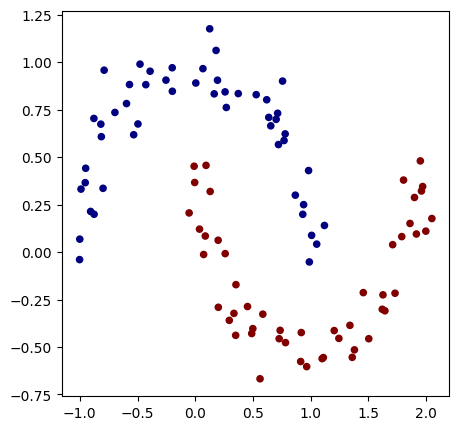

In [8]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [9]:
model = MLP(2, [10,10,1])
print(f'number of params: {len(model.parameters())}')

number of params: 130


In [10]:
lr = 0.01

loss_all = 0

for epoch in range(100):
    # forward pass
    ypreds = [model(x) for x in X]
    loss = mse_loss(ypreds, y)

    # backward pass
    for p in model.parameters():
      p.grad = 0.0

    loss.backward()

    # update
    for p in model.parameters():
      p.data -= lr*p.grad

    if epoch % 5 == 0:
      print(f'epoch {epoch}, loss {loss.data: 0.4f}')

epoch 0, loss  54.3577
epoch 5, loss  32.5898
epoch 10, loss  47.0277
epoch 15, loss  17.1348
epoch 20, loss  25.1681
epoch 25, loss  9.0463
epoch 30, loss  24.1663
epoch 35, loss  4.5082
epoch 40, loss  2.0297
epoch 45, loss  1.5923
epoch 50, loss  1.3249
epoch 55, loss  1.1278
epoch 60, loss  0.9764
epoch 65, loss  0.8571
epoch 70, loss  0.7610
epoch 75, loss  0.6822
epoch 80, loss  0.6166
epoch 85, loss  0.5613
epoch 90, loss  0.5142
epoch 95, loss  0.4736


(-1.6674882113912908, 2.0825117886087092)

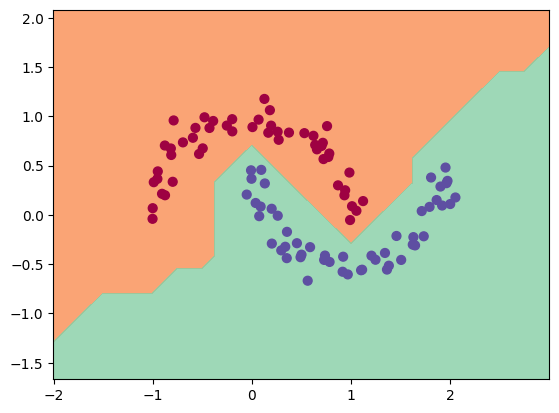

In [11]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())